In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("mental-health-in-tech-survey.csv")

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
# Creating a dataframe for each protected class addressed in the data
age_df = df.filter(['Age', 'treatment', 'mental_health_consequence', 'phys_health_consequence'], axis=1)
gender_df = df.filter(['Gender', 'treatment', 'mental_health_consequence', 'phys_health_consequence'], axis=1)
genetic_info_df = df.filter(['family_history', 'treatment', 'mental_health_consequence', 'phys_health_consequence'], axis=1)

In [9]:
df['old'] = df.Age >= 40
# Age >= 40

# Count the number of entries with Age >= 40
old_age = (df.Age >= 40).sum()
young_age = (df.Age < 40).sum()




# TREATMENT
# Total people who have and haven't sought treatment
treatment_yes = (df.treatment == 'Yes').sum()
treatment_no = (df.treatment == 'No').sum()

# Old and gotten treatment/no treatment
old_and_treatment = ((df.old > 0) & (df.treatment == 'Yes')).sum()
old_no_treatment = ((df.old > 0) & (df.treatment == 'No')).sum()

# Young and treatment
young_and_treatment = ((df.old == 0) & (df.treatment == 'Yes')).sum()
young_no_treatment = ((df.old == 0) & (df.treatment == 'No')).sum()




# MENTAL HEALTH
# Total mental_health_consequence
mental_health_cons_yes = (df.mental_health_consequence == 'Yes').sum()
mental_health_cons_maybe = (df.mental_health_consequence == 'Maybe').sum()
mental_health_cons_no = (df.mental_health_consequence == 'No').sum()

# Old and mental health consequence
old_mental_health_cons_yes = ((df.old > 0) & (df.mental_health_consequence == 'Yes')).sum()
old_mental_health_cons_maybe = ((df.old > 0) & (df.mental_health_consequence == 'Maybe')).sum()
old_mental_health_cons_no = ((df.old > 0) & (df.mental_health_consequence == 'No')).sum()

# Young and mental health consequence
young_mental_health_cons_yes = ((df.old == 0) & (df.mental_health_consequence == 'Yes')).sum()
young_mental_health_cons_maybe = ((df.old == 0) & (df.mental_health_consequence == 'Maybe')).sum()
young_mental_health_cons_no = ((df.old == 0) & (df.mental_health_consequence == 'No')).sum()




# PHYSICAL HEALTH
# Total phys_health_consequence
phys_health_cons_yes = (df.phys_health_consequence == 'Yes').sum()
phys_health_cons_maybe = (df.phys_health_consequence == 'Maybe').sum()
phys_health_cons_no = (df.phys_health_consequence == 'No').sum()

# Old and phys health consequence
old_phys_health_cons_yes = ((df.old > 0) & (df.phys_health_consequence == 'Yes')).sum()
old_phys_health_cons_maybe = ((df.old > 0) & (df.phys_health_consequence == 'Maybe')).sum()
old_phys_health_cons_no = ((df.old > 0) & (df.phys_health_consequence == 'No')).sum()

# Young and phys health consequence
young_phys_health_cons_yes = ((df.old == 0) & (df.phys_health_consequence == 'Yes')).sum()
young_phys_health_cons_maybe = ((df.old == 0) & (df.phys_health_consequence == 'Maybe')).sum()
young_phys_health_cons_no = ((df.old == 0) & (df.phys_health_consequence == 'No')).sum()

print("Total Old: %i" %(old_age))
print("Total Young: %i" %(young_age))
print()
print()
print("Treatment Yes: %i" %(treatment_yes))
print("Treatment No: %i" %(treatment_no))
print("Old people who received treatment: %i" %(old_and_treatment))
print("Old people who did not received treatment: %i" %(old_no_treatment))
print("Young people who received treatment: %i" %(young_and_treatment))
print("Young people who did not received treatment: %i" %(young_no_treatment))
print()
print()
print("Mental Health Consequence Yes: %i" %(mental_health_cons_yes))
print("Mental Health Consequence Maybe: %i" %(mental_health_cons_maybe))
print("Mental Health Consequence No: %i" %(mental_health_cons_no))
print("Old people, Mental Health cons=Yes: %i" %(old_mental_health_cons_yes))
print("Old people, Mental Health cons=Maybe: %i" %(old_mental_health_cons_maybe))
print("Old people, Mental Health cons=No: %i" %(old_mental_health_cons_no))
print("Young people, Mental Health cons=Yes: %i" %(young_mental_health_cons_yes))
print("Young people, Mental Health cons=Maybe: %i" %(young_mental_health_cons_maybe))
print("Young people, Mental Health cons=No: %i" %(young_mental_health_cons_no))
print()
print()
print("Physical Health Consequence Yes: %i" %(phys_health_cons_yes))
print("Physical Health Consequence Maybe: %i" %(phys_health_cons_maybe))
print("Physical Health Consequence No: %i" %(phys_health_cons_no))
print("Old people, Physical Health cons=Yes: %i" %(old_phys_health_cons_yes))
print("Old people, Physical Health cons=Maybe: %i" %(old_phys_health_cons_maybe))
print("Old people, Physical Health cons=No: %i" %(old_phys_health_cons_no))
print("Young people, Physical Health cons=Yes: %i" %(young_phys_health_cons_yes))
print("Young people, Physical Health cons=Maybe: %i" %(young_phys_health_cons_maybe))
print("Young people, Physical Health cons=No: %i" %(young_phys_health_cons_no))

Total Old: 183
Total Young: 1076


Treatment Yes: 637
Treatment No: 622
Old people who received treatment: 107
Old people who did not received treatment: 76
Young people who received treatment: 530
Young people who did not received treatment: 546


Mental Health Consequence Yes: 292
Mental Health Consequence Maybe: 477
Mental Health Consequence No: 490
Old people, Mental Health cons=Yes: 51
Old people, Mental Health cons=Maybe: 75
Old people, Mental Health cons=No: 57
Young people, Mental Health cons=Yes: 241
Young people, Mental Health cons=Maybe: 402
Young people, Mental Health cons=No: 433


Physical Health Consequence Yes: 61
Physical Health Consequence Maybe: 273
Physical Health Consequence No: 925
Old people, Physical Health cons=Yes: 12
Old people, Physical Health cons=Maybe: 52
Old people, Physical Health cons=No: 119
Young people, Physical Health cons=Yes: 49
Young people, Physical Health cons=Maybe: 221
Young people, Physical Health cons=No: 806


In [10]:
# female, woman, f, she (upper and lowercase)
# male, m, 

# Count the number of entries containing female or something similar
gender_female = (gender_df.Gender.str.contains('female') | \
gender_df.Gender.str.contains('Female') | \
gender_df.Gender.str.contains('woman') | \
gender_df.Gender.str.contains('Woman') | \
gender_df.Gender.str.contains('she') | \
gender_df.Gender.str.contains('She') | \
gender_df.Gender.str.contains('f') | \
gender_df.Gender.str.contains('F')).sum()

df['female'] = gender_df.Gender.str.contains('female') | \
gender_df.Gender.str.contains('Female') | \
gender_df.Gender.str.contains('woman') | \
gender_df.Gender.str.contains('Woman') | \
gender_df.Gender.str.contains('she') | \
gender_df.Gender.str.contains('She') | \
gender_df.Gender.str.contains('f') | \
gender_df.Gender.str.contains('F')

# Classify everything else as male
# Subject the number of females from the total number of entries
gender_male = df['Timestamp'].count() - gender_female




# TREATMENT
# Total people who have and haven't sought treatment
gender_treatment_yes = (gender_df[['treatment']] == 'Yes').sum()
gender_treatment_no = (gender_df[['treatment']] == 'No').sum()

# Female and gotten treatment/no treatment
female_and_treatment = ((df.female > 0) & (df.treatment == 'Yes')).sum()
female_no_treatment = ((df.female > 0) & (df.treatment == 'No')).sum()

# Male and treatment
male_and_treatment = ((df.female == 0) & (df.treatment == 'Yes')).sum()
male_no_treatment = ((df.female == 0) & (df.treatment == 'No')).sum()




# MENTAL HEALTH
# Total mental_health_consequence
gender_health_cons_yes = (df.mental_health_consequence == 'Yes').sum()
gender_health_cons_maybe = (df.mental_health_consequence == 'Maybe').sum()
gender_health_cons_no = (df.mental_health_consequence == 'No').sum()

# Female and mental health consequence
female_health_cons_yes = ((df.female > 0) & (df.mental_health_consequence == 'Yes')).sum()
female_health_cons_maybe = ((df.female > 0) & (df.mental_health_consequence == 'Maybe')).sum()
female_health_cons_no = ((df.female > 0) & (df.mental_health_consequence == 'No')).sum()

# Male and mental health consequence
male_health_cons_yes = ((df.female == 0) & (df.mental_health_consequence == 'Yes')).sum()
male_health_cons_maybe = ((df.female == 0) & (df.mental_health_consequence == 'Maybe')).sum()
male_health_cons_no = ((df.female == 0) & (df.mental_health_consequence == 'No')).sum()




# PHYSICAL HEALTH
# Total phys_health_consequence
gender_phys_health_cons_yes = (df.phys_health_consequence == 'Yes').sum()
gender_phys_health_cons_maybe = (df.phys_health_consequence == 'Maybe').sum()
gender_phys_health_cons_no = (df.phys_health_consequence == 'No').sum()

# Female and phys health consequence
female_phys_health_cons_yes = ((df.female > 0) & (df.phys_health_consequence == 'Yes')).sum()
female_phys_health_cons_maybe = ((df.female > 0) & (df.phys_health_consequence == 'Maybe')).sum()
female_phys_health_cons_no = ((df.female > 0) & (df.phys_health_consequence == 'No')).sum()

# Male and phys health consequence
male_phys_health_cons_yes = ((df.female == 0) & (df.phys_health_consequence == 'Yes')).sum()
male_phys_health_cons_maybe = ((df.female == 0) & (df.phys_health_consequence == 'Maybe')).sum()
male_phys_health_cons_no = ((df.female == 0) & (df.phys_health_consequence == 'No')).sum()

print("Total Female: %i" %(gender_female))
print("Total Male: %i" %(gender_male))
print()
print()
print("Treatment Y: %i" %(gender_treatment_yes))
print("Treatment N: %i" %(gender_treatment_no))
print("Females who received treatment: %i" %(female_and_treatment))
print("Females who did not received treatment: %i" %(female_no_treatment))
print("Males who received treatment: %i" %(male_and_treatment))
print("Males who did not received treatment: %i" %(male_no_treatment))
print()
print()
print("Mental Health Consequence Yes: %i" %(gender_health_cons_yes))
print("Mental Health Consequence Maybe: %i" %(gender_health_cons_maybe))
print("Mental Health Consequence No: %i" %(gender_health_cons_no))
print("Females, Mental Health cons=Yes: %i" %(female_health_cons_yes))
print("Females, Mental Health cons=Maybe: %i" %(female_health_cons_maybe))
print("Females, Mental Health cons=No: %i" %(female_health_cons_no))
print("Males, Mental Health cons=Yes: %i" %(male_health_cons_yes))
print("Males, Mental Health cons=Maybe: %i" %(male_health_cons_maybe))
print("Males, Mental Health cons=No: %i" %(male_health_cons_no))
print()
print()
print("Physical Health Consequence Yes: %i" %(gender_phys_health_cons_yes))
print("Physical Health Consequence Maybe: %i" %(gender_phys_health_cons_maybe))
print("Physical Health Consequence No: %i" %(gender_phys_health_cons_no))
print("Females, Physical Health cons=Yes: %i" %(female_phys_health_cons_yes))
print("Females, Physical Health cons=Maybe: %i" %(female_phys_health_cons_maybe))
print("Females, Physical Health cons=No: %i" %(female_phys_health_cons_no))
print("Males, Physical Health cons=Yes: %i" %(male_phys_health_cons_yes))
print("Males, Physical Health cons=Maybe: %i" %(male_phys_health_cons_maybe))
print("Males, Physical Health cons=No: %i" %(male_phys_health_cons_no))

Total Female: 253
Total Male: 1006


Treatment Y: 637
Treatment N: 622
Females who received treatment: 175
Females who did not received treatment: 78
Males who received treatment: 462
Males who did not received treatment: 544


Mental Health Consequence Yes: 292
Mental Health Consequence Maybe: 477
Mental Health Consequence No: 490
Females, Mental Health cons=Yes: 68
Females, Mental Health cons=Maybe: 111
Females, Mental Health cons=No: 74
Males, Mental Health cons=Yes: 224
Males, Mental Health cons=Maybe: 366
Males, Mental Health cons=No: 416


Physical Health Consequence Yes: 61
Physical Health Consequence Maybe: 273
Physical Health Consequence No: 925
Females, Physical Health cons=Yes: 16
Females, Physical Health cons=Maybe: 69
Females, Physical Health cons=No: 168
Males, Physical Health cons=Yes: 45
Males, Physical Health cons=Maybe: 204
Males, Physical Health cons=No: 757


In [11]:
# df['history'] = df.Age >= 40
# family_history = Yes

# Count the number of entries with family_history = Yes
history = (df.family_history == 'Yes').sum()
no_history = (df.family_history == 'No').sum()




# TREATMENT
# Total people who have and haven't sought treatment
treatment_yes = (df.treatment == 'Yes').sum()
treatment_no = (df.treatment == 'No').sum()

# Old and gotten treatment/no treatment
history_and_treatment = ((df.family_history == 'Yes') & (df.treatment == 'Yes')).sum()
history_no_treatment = ((df.family_history == 'Yes') & (df.treatment == 'No')).sum()

# Young and treatment
no_history_and_treatment = ((df.family_history == 'No') & (df.treatment == 'Yes')).sum()
no_history_no_treatment = ((df.family_history == 'No') & (df.treatment == 'No')).sum()




# MENTAL HEALTH
# Total mental_health_consequence
mental_health_cons_yes = (df.mental_health_consequence == 'Yes').sum()
mental_health_cons_maybe = (df.mental_health_consequence == 'Maybe').sum()
mental_health_cons_no = (df.mental_health_consequence == 'No').sum()

# Old and mental health consequence
history_mental_health_cons_yes = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'Yes')).sum()
history_mental_health_cons_maybe = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'Maybe')).sum()
history_mental_health_cons_no = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'No')).sum()

# Young and mental health consequence
no_history_mental_health_cons_yes = ((df.family_history == 'No') & (df.mental_health_consequence == 'Yes')).sum()
no_history_mental_health_cons_maybe = ((df.family_history == 'No') & (df.mental_health_consequence == 'Maybe')).sum()
no_history_mental_health_cons_no = ((df.family_history == 'No') & (df.mental_health_consequence == 'No')).sum()




# PHYSICAL HEALTH
# Total phys_health_consequence
phys_health_cons_yes = (df.phys_health_consequence == 'Yes').sum()
phys_health_cons_maybe = (df.phys_health_consequence == 'Maybe').sum()
phys_health_cons_no = (df.phys_health_consequence == 'No').sum()

# Old and phys health consequence
history_phys_health_cons_yes = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'Yes')).sum()
history_phys_health_cons_maybe = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'Maybe')).sum()
history_phys_health_cons_no = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'No')).sum()

# Young and phys health consequence
no_history_phys_health_cons_yes = ((df.family_history == 'No') & (df.phys_health_consequence == 'Yes')).sum()
no_history_phys_health_cons_maybe = ((df.family_history == 'No') & (df.phys_health_consequence == 'Maybe')).sum()
no_history_phys_health_cons_no = ((df.family_history == 'No') & (df.phys_health_consequence == 'No')).sum()

print("Total with a family history: %i" %(history))
print("Total without a family history: %i" %(no_history))
print()
print()
print("Treatment Yes: %i" %(treatment_yes))
print("Treatment No: %i" %(treatment_no))
print("People with a family history who received treatment: %i" %(history_and_treatment))
print("People with a family history who did not received treatment: %i" %(history_no_treatment))
print("People with no family history people who received treatment: %i" %(no_history_and_treatment))
print("People with no family history who did not received treatment: %i" %(no_history_no_treatment))
print()
print()
print("Mental Health Consequence Yes: %i" %(mental_health_cons_yes))
print("Mental Health Consequence Maybe: %i" %(mental_health_cons_maybe))
print("Mental Health Consequence No: %i" %(mental_health_cons_no))
print("People with a family history, Mental Health cons=Yes: %i" %(history_mental_health_cons_yes))
print("People with a family history, Mental Health cons=Maybe: %i" %(history_mental_health_cons_maybe))
print("People with a family history, Mental Health cons=No: %i" %(history_mental_health_cons_no))
print("People with no family history, Mental Health cons=Yes: %i" %(no_history_mental_health_cons_yes))
print("People with no family history, Mental Health cons=Maybe: %i" %(no_history_mental_health_cons_maybe))
print("People with no family history, Mental Health cons=No: %i" %(no_history_mental_health_cons_no))
print()
print()
print("Physical Health Consequence Yes: %i" %(phys_health_cons_yes))
print("Physical Health Consequence Maybe: %i" %(phys_health_cons_maybe))
print("Physical Health Consequence No: %i" %(phys_health_cons_no))
print("People with a family history, Physical Health cons=Yes: %i" %(history_phys_health_cons_yes))
print("People with a family history, Physical Health cons=Maybe: %i" %(history_phys_health_cons_maybe))
print("People with a family history, Physical Health cons=No: %i" %(history_phys_health_cons_no))
print("People with no family history, Physical Health cons=Yes: %i" %(no_history_phys_health_cons_yes))
print("People with no family history, Physical Health cons=Maybe: %i" %(no_history_phys_health_cons_maybe))
print("People with no family history, Physical Health cons=No: %i" %(no_history_phys_health_cons_no))

Total with a family history: 492
Total without a family history: 767


Treatment Yes: 637
Treatment No: 622
People with a family history who received treatment: 365
People with a family history who did not received treatment: 127
People with no family history people who received treatment: 272
People with no family history who did not received treatment: 495


Mental Health Consequence Yes: 292
Mental Health Consequence Maybe: 477
Mental Health Consequence No: 490
People with a family history, Mental Health cons=Yes: 134
People with a family history, Mental Health cons=Maybe: 193
People with a family history, Mental Health cons=No: 165
People with no family history, Mental Health cons=Yes: 158
People with no family history, Mental Health cons=Maybe: 284
People with no family history, Mental Health cons=No: 325


Physical Health Consequence Yes: 61
Physical Health Consequence Maybe: 273
Physical Health Consequence No: 925
People with a family history, Physical Health cons=Yes: 31
People

In [19]:
# df['history'] = df.Age >= 40
# family_history = Yes

# Count the number of entries with family_history = Yes
history = (df.family_history == 'Yes').sum()
no_history = (df.family_history == 'No').sum()




# TREATMENT
# Total people who have and haven't sought treatment
treatment_yes = (df.treatment == 'Yes').sum()
treatment_no = (df.treatment == 'No').sum()

# Old and gotten treatment/no treatment
history_and_treatment = ((df.family_history == 'Yes') & (df.treatment == 'Yes')).sum()
history_no_treatment = ((df.family_history == 'Yes') & (df.treatment == 'No')).sum()

# Young and treatment
no_history_and_treatment = ((df.family_history == 'No') & (df.treatment == 'Yes')).sum()
history_and_treatment2 = history_and_treatment
no_history_no_treatment = ((df.family_history == 'No') & (df.treatment == 'No')).sum()




# MENTAL HEALTH
# Total mental_health_consequence
mental_health_cons_yes = (df.mental_health_consequence == 'Yes').sum()
mental_health_cons_maybe = (df.mental_health_consequence == 'Maybe').sum()
mental_health_cons_no = (df.mental_health_consequence == 'No').sum()

# Old and mental health consequence
history_mental_health_cons_yes = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'Yes')).sum()
history_mental_health_cons_maybe = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'Maybe')).sum()
history_mental_health_cons_no = ((df.family_history == 'Yes') & (df.mental_health_consequence == 'No')).sum()

# Young and mental health consequence
no_history_mental_health_cons_yes = ((df.family_history == 'No') & (df.mental_health_consequence == 'Yes')).sum()
no_history_mental_health_cons_maybe = ((df.family_history == 'No') & (df.mental_health_consequence == 'Maybe')).sum()
no_history_mental_health_cons_no = ((df.family_history == 'No') & (df.mental_health_consequence == 'No')).sum()




# PHYSICAL HEALTH
# Total phys_health_consequence
phys_health_cons_yes = (df.phys_health_consequence == 'Yes').sum()
phys_health_cons_maybe = (df.phys_health_consequence == 'Maybe').sum()
phys_health_cons_no = (df.phys_health_consequence == 'No').sum()

# Old and phys health consequence
history_phys_health_cons_yes = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'Yes')).sum()
history_phys_health_cons_maybe = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'Maybe')).sum()
history_phys_health_cons_no = ((df.family_history == 'Yes') & (df.phys_health_consequence == 'No')).sum()

# Young and phys health consequence
no_history_phys_health_cons_yes = ((df.family_history == 'No') & (df.phys_health_consequence == 'Yes')).sum()
no_history_phys_health_cons_maybe = ((df.family_history == 'No') & (df.phys_health_consequence == 'Maybe')).sum()
no_history_phys_health_cons_no = ((df.family_history == 'No') & (df.phys_health_consequence == 'No')).sum()

print("Total with a family history: %i" %(history))
print("Total without a family history: %i" %(no_history))
print()
print()
print("Treatment Yes: %i" %(treatment_yes))
print("Treatment No: %i" %(treatment_no))
print("People with a family history who received treatment: %i" %(history_and_treatment))
print("People with a family history who did not received treatment: %i" %(history_no_treatment))
print("People with no family history people who received treatment: %i" %(no_history_and_treatment))
print("People with no family history who did not received treatment: %i" %(no_history_no_treatment))
print()
print()
print("Mental Health Consequence Yes: %i" %(mental_health_cons_yes))
print("Mental Health Consequence Maybe: %i" %(mental_health_cons_maybe))
print("Mental Health Consequence No: %i" %(mental_health_cons_no))
print("People with a family history, Mental Health cons=Yes: %i" %(history_mental_health_cons_yes))
print("People with a family history, Mental Health cons=Maybe: %i" %(history_mental_health_cons_maybe))
print("People with a family history, Mental Health cons=No: %i" %(history_mental_health_cons_no))
print("People with no family history, Mental Health cons=Yes: %i" %(no_history_mental_health_cons_yes))
print("People with no family history, Mental Health cons=Maybe: %i" %(no_history_mental_health_cons_maybe))
print("People with no family history, Mental Health cons=No: %i" %(no_history_mental_health_cons_no))
print()
print()
print("Physical Health Consequence Yes: %i" %(phys_health_cons_yes))
print("Physical Health Consequence Maybe: %i" %(phys_health_cons_maybe))
print("Physical Health Consequence No: %i" %(phys_health_cons_no))
print("People with a family history, Physical Health cons=Yes: %i" %(history_phys_health_cons_yes))
print("People with a family history, Physical Health cons=Maybe: %i" %(history_phys_health_cons_maybe))
print("People with a family history, Physical Health cons=No: %i" %(history_phys_health_cons_no))
print("People with no family history, Physical Health cons=Yes: %i" %(no_history_phys_health_cons_yes))
print("People with no family history, Physical Health cons=Maybe: %i" %(no_history_phys_health_cons_maybe))
print("People with no family history, Physical Health cons=No: %i" %(no_history_phys_health_cons_no))

Total with a family history: 492
Total without a family history: 767


Treatment Yes: 637
Treatment No: 622
People with a family history who received treatment: 365
People with a family history who did not received treatment: 127
People with no family history people who received treatment: 272
People with no family history who did not received treatment: 495


Mental Health Consequence Yes: 292
Mental Health Consequence Maybe: 477
Mental Health Consequence No: 490
People with a family history, Mental Health cons=Yes: 134
People with a family history, Mental Health cons=Maybe: 193
People with a family history, Mental Health cons=No: 165
People with no family history, Mental Health cons=Yes: 158
People with no family history, Mental Health cons=Maybe: 284
People with no family history, Mental Health cons=No: 325


Physical Health Consequence Yes: 61
Physical Health Consequence Maybe: 273
Physical Health Consequence No: 925
People with a family history, Physical Health cons=Yes: 31
People

In [13]:
for name, group in df.groupby('Country'):
    # TREATMENT
    # Total people who have and haven't sought treatment for each country
    treatment_yes = (group.treatment == 'Yes').sum()
    treatment_no = (group.treatment == 'No').sum()

    # MENTAL HEALTH
    # Total mental_health_consequence
    mental_health_cons_yes = (group.mental_health_consequence == 'Yes').sum()
    mental_health_cons_maybe = (group.mental_health_consequence == 'Maybe').sum()
    mental_health_cons_no = (group.mental_health_consequence == 'No').sum()
    
    # PHYSICAL HEALTH
    # Total phys_health_consequence
    phys_health_cons_yes = (group.phys_health_consequence == 'Yes').sum()
    phys_health_cons_maybe = (group.phys_health_consequence == 'Maybe').sum()
    phys_health_cons_no = (group.phys_health_consequence == 'No').sum()
    print("%s:" %(name))
    print("\tSought Treatment Yes: %i" %(treatment_yes))
    print("\tSought Treatment No: %i" %(treatment_no))
    print()
    print("\tMental Health Consequence Yes: %i" %(mental_health_cons_yes))
    print("\tMental Health Consequence Maybe: %i" %(mental_health_cons_maybe))
    print("\tMental Health Consequence No: %i" %(mental_health_cons_no))
    print()
    print("\tPhysical Health Consequence Yes: %i" %(phys_health_cons_yes))
    print("\tPhysical Health Consequence Maybe: %i" %(phys_health_cons_maybe))
    print("\tPhysical Health Consequence No: %i" %(phys_health_cons_no))
    print()
    print()
    print()
    print()

Australia:
	Sought Treatment Yes: 13
	Sought Treatment No: 8

	Mental Health Consequence Yes: 8
	Mental Health Consequence Maybe: 3
	Mental Health Consequence No: 10

	Physical Health Consequence Yes: 1
	Physical Health Consequence Maybe: 3
	Physical Health Consequence No: 17




Austria:
	Sought Treatment Yes: 0
	Sought Treatment No: 3

	Mental Health Consequence Yes: 0
	Mental Health Consequence Maybe: 0
	Mental Health Consequence No: 3

	Physical Health Consequence Yes: 0
	Physical Health Consequence Maybe: 0
	Physical Health Consequence No: 3




Bahamas, The:
	Sought Treatment Yes: 1
	Sought Treatment No: 0

	Mental Health Consequence Yes: 1
	Mental Health Consequence Maybe: 0
	Mental Health Consequence No: 0

	Physical Health Consequence Yes: 1
	Physical Health Consequence Maybe: 0
	Physical Health Consequence No: 0




Belgium:
	Sought Treatment Yes: 1
	Sought Treatment No: 5

	Mental Health Consequence Yes: 2
	Mental Health Consequence Maybe: 4
	Mental Health Consequence No: 0


Portugal:
	Sought Treatment Yes: 0
	Sought Treatment No: 2

	Mental Health Consequence Yes: 1
	Mental Health Consequence Maybe: 1
	Mental Health Consequence No: 0

	Physical Health Consequence Yes: 0
	Physical Health Consequence Maybe: 0
	Physical Health Consequence No: 2




Romania:
	Sought Treatment Yes: 0
	Sought Treatment No: 1

	Mental Health Consequence Yes: 0
	Mental Health Consequence Maybe: 1
	Mental Health Consequence No: 0

	Physical Health Consequence Yes: 0
	Physical Health Consequence Maybe: 1
	Physical Health Consequence No: 0




Russia:
	Sought Treatment Yes: 0
	Sought Treatment No: 3

	Mental Health Consequence Yes: 1
	Mental Health Consequence Maybe: 0
	Mental Health Consequence No: 2

	Physical Health Consequence Yes: 0
	Physical Health Consequence Maybe: 1
	Physical Health Consequence No: 2




Singapore:
	Sought Treatment Yes: 1
	Sought Treatment No: 3

	Mental Health Consequence Yes: 2
	Mental Health Consequence Maybe: 2
	Mental Health Consequence No: 0

	Physic

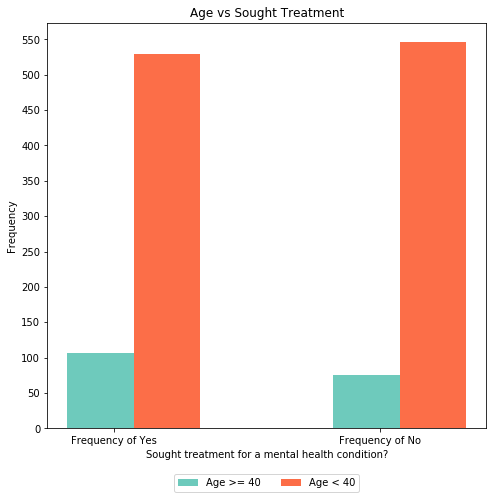

In [15]:
# AGE - Sought Treatment
n_groups = 2
ageGreater40 = (old_and_treatment, old_no_treatment)
ageLess40 = (young_and_treatment, young_no_treatment)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, ageGreater40 , bar_width,
alpha=opacity,
color= '#4ABDAC',
label='Age >= 40')
 
rects2 = plt.bar(index + bar_width, ageLess40, bar_width,
alpha=opacity,
color='#FC4A1A',
label='Age < 40')
 
plt.xlabel('Sought treatment for a mental health condition?')
plt.ylabel('Frequency')
plt.title('Age vs Sought Treatment')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of No'))
plt.yticks(np.arange(0, 600, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

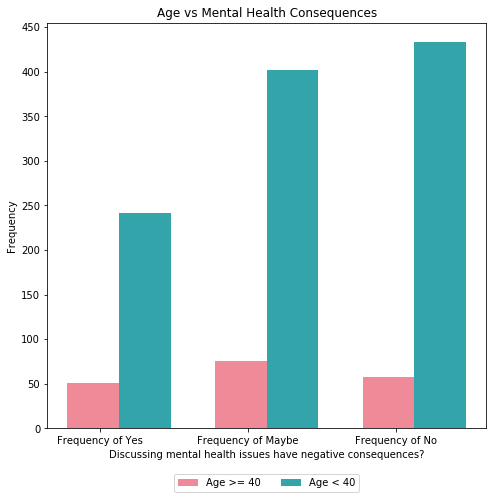

In [16]:
# AGE - Mental Health Consequences
n_groups = 3
ageGreater40 = (old_mental_health_cons_yes, old_mental_health_cons_maybe, old_mental_health_cons_no)
ageLess40 = (young_mental_health_cons_yes, young_mental_health_cons_maybe, young_mental_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, ageGreater40 , bar_width,
alpha=opacity,
color= '#EB6E80',
label='Age >= 40')
 
rects2 = plt.bar(index + bar_width, ageLess40, bar_width,
alpha=opacity,
color='#008F95',
label='Age < 40')
 
plt.xlabel('Discussing mental health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Age vs Mental Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 500, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

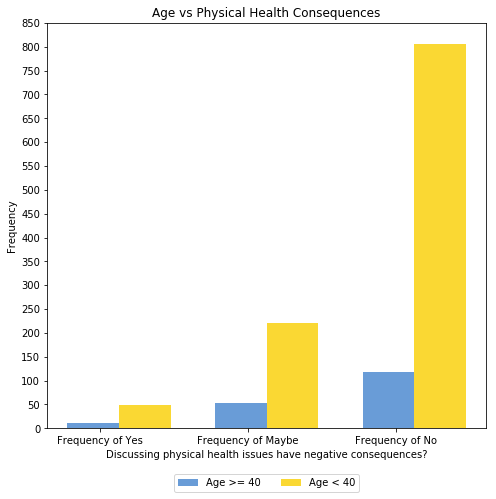

In [17]:
# AGE - Physical Health Consequences
n_groups = 3
ageGreater40 = (old_phys_health_cons_yes, old_phys_health_cons_maybe, old_phys_health_cons_no)
ageLess40 = (young_phys_health_cons_yes, young_phys_health_cons_maybe, young_phys_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, ageGreater40 , bar_width,
alpha=opacity,
color= '#4484CE',
label='Age >= 40')
 
rects2 = plt.bar(index + bar_width, ageLess40, bar_width,
alpha=opacity,
color='#F9CF00',
label='Age < 40')
 
plt.xlabel('Discussing physical health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Age vs Physical Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 900, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

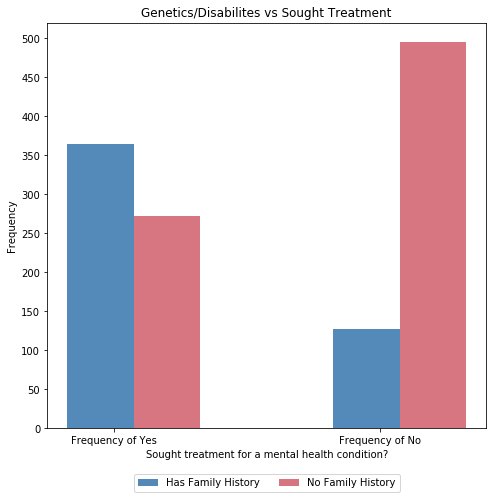

In [20]:
# GENETICS/DISABILITIES - Sought Treatment
n_groups = 2
familyHistory = (history_and_treatment2, history_no_treatment)
noFamilyHistory = (no_history_and_treatment, no_history_no_treatment)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, familyHistory , bar_width,
alpha=opacity,
color= '#286DA8',
label='Has Family History')
 
rects2 = plt.bar(index + bar_width, noFamilyHistory, bar_width,
alpha=opacity,
color='#CD5360',
label='No Family History')
 
plt.xlabel('Sought treatment for a mental health condition?')
plt.ylabel('Frequency')
plt.title('Genetics/Disabilites vs Sought Treatment')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of No'))
plt.yticks(np.arange(0, 550, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

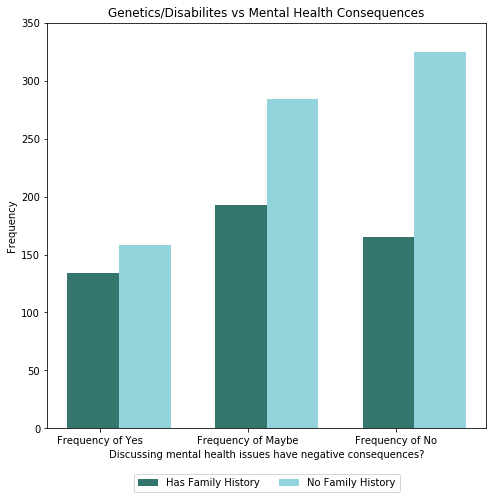

In [21]:
# GENETICS/DISABILITIES - Mental Health Consequences
n_groups = 3
familyHistory = (history_mental_health_cons_yes, history_mental_health_cons_maybe, history_mental_health_cons_no)
noFamilyHistory = (no_history_mental_health_cons_yes, no_history_mental_health_cons_maybe, no_history_mental_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, familyHistory , bar_width,
alpha=opacity,
color= '#015249',
label='Has Family History')
 
rects2 = plt.bar(index + bar_width, noFamilyHistory, bar_width,
alpha=opacity,
color='#77C9D4',
label='No Family History')
 
plt.xlabel('Discussing mental health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Genetics/Disabilites vs Mental Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 400, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

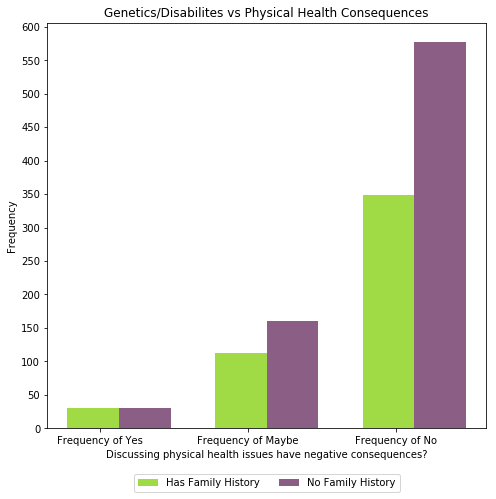

In [22]:
# GENETICS/DISABILITIES - Physical Health Consequences
n_groups = 3
familyHistory = (history_phys_health_cons_yes, history_phys_health_cons_maybe, history_phys_health_cons_no)
noFamilyHistory = (no_history_phys_health_cons_yes, no_history_phys_health_cons_maybe, no_history_phys_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, familyHistory , bar_width,
alpha=opacity,
color= '#88D317',
label='Has Family History')
 
rects2 = plt.bar(index + bar_width, noFamilyHistory, bar_width,
alpha=opacity,
color='#6E3667',
label='No Family History')
 
plt.xlabel('Discussing physical health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Genetics/Disabilites vs Physical Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 650, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

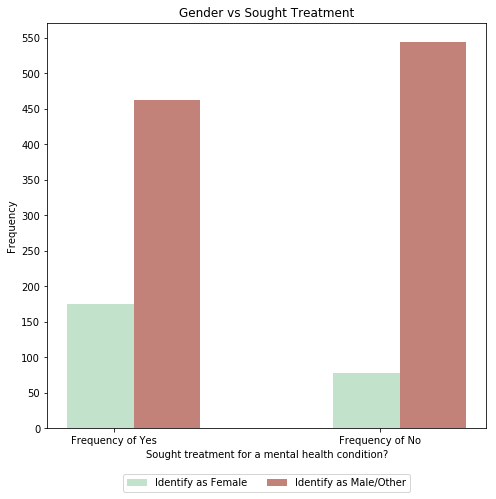

In [23]:
# GENDER - Sought Treatment
n_groups = 2
female = (female_and_treatment, female_no_treatment)
male = (male_and_treatment, male_no_treatment)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, female , bar_width,
alpha=opacity,
color= '#B4DBC0',
label='Identify as Female')
 
rects2 = plt.bar(index + bar_width, male, bar_width,
alpha=opacity,
color='#B56357',
label='Identify as Male/Other')
 
plt.xlabel('Sought treatment for a mental health condition?')
plt.ylabel('Frequency')
plt.title('Gender vs Sought Treatment')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of No'))
plt.yticks(np.arange(0, 600, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

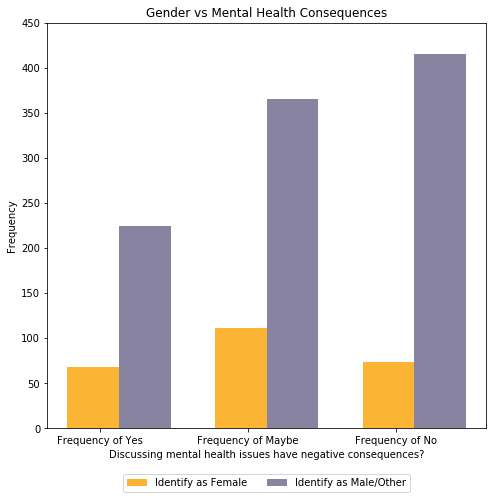

In [24]:
# GENDER - Mental Health Consequences
n_groups = 3
female = (female_health_cons_yes, female_health_cons_maybe, female_health_cons_no)
male = (male_health_cons_yes, male_health_cons_maybe, male_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, female , bar_width,
alpha=opacity,
color= '#FBA100',
label='Identify as Female')
 
rects2 = plt.bar(index + bar_width, male, bar_width,
alpha=opacity,
color='#6C648B',
label='Identify as Male/Other')
 
plt.xlabel('Discussing mental health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Gender vs Mental Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 500, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()

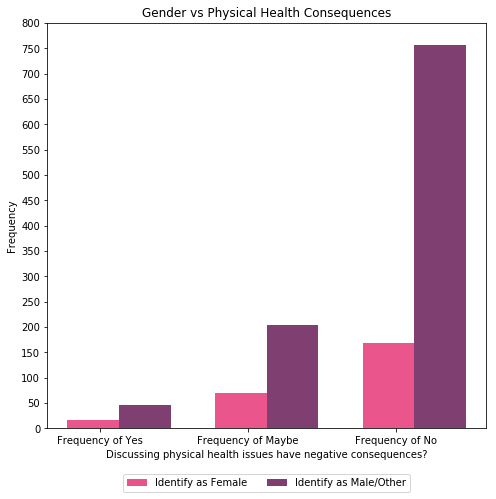

In [25]:
# GENDER - Physical Health Consequences
n_groups = 3
female = (female_phys_health_cons_yes, female_phys_health_cons_maybe, female_phys_health_cons_no)
male = (male_phys_health_cons_yes, male_phys_health_cons_maybe, male_phys_health_cons_no)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, female , bar_width,
alpha=opacity,
color= '#E52A6F',
label='Identify as Female')
 
rects2 = plt.bar(index + bar_width, male, bar_width,
alpha=opacity,
color='#5F0F4E',
label='Identify as Male/Other')
 
plt.xlabel('Discussing physical health issues have negative consequences?')
plt.ylabel('Frequency')
plt.title('Gender vs Physical Health Consequences')
plt.xticks(index + .05, ('Frequency of Yes', 'Frequency of Maybe','Frequency of No'))
plt.yticks(np.arange(0, 850, 50))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)


plt.rcParams["figure.figsize"] = [7,7]

plt.tight_layout()
plt.show()